## Nama : Ignatius Arvantya Hartono
## Email : kenapayakangatau@gmail.com

In [8]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-26 02:39:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.64MB/s    in 4m 5s   

2021-04-26 02:44:01 (1.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [9]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [10]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split=0.4,
    
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [20]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 41s - loss: 0.2467 - accuracy: 0.9162 - val_loss: 0.1485 - val_accuracy: 0.9625
Epoch 2/20
25/25 - 41s - loss: 0.1295 - accuracy: 0.9500 - val_loss: 0.1023 - val_accuracy: 0.9688
Epoch 3/20
25/25 - 41s - loss: 0.1177 - accuracy: 0.9638 - val_loss: 0.1795 - val_accuracy: 0.9750
Epoch 4/20
25/25 - 40s - loss: 0.0925 - accuracy: 0.9714 - val_loss: 0.1806 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 40s - loss: 0.1064 - accuracy: 0.9610 - val_loss: 0.1468 - val_accuracy: 0.9625
Epoch 6/20
25/25 - 40s - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0945 - val_accuracy: 0.9625
Epoch 7/20
25/25 - 40s - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0792 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 41s - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0669 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 41s - loss: 0.0464 - accuracy: 0.9825 - val_loss: 0.0594 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 41s - loss: 0.0350 - accuracy: 0.9912 - val_loss: 0.0603 - val_accuracy: 0.9750
Epoch 11/

Saving IMG-6451.JPG to IMG-6451 (12).JPG
[[1. 0. 0.]]
IMG-6451.JPG
rock


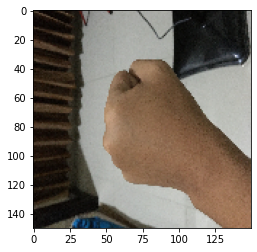

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

  print(fn)
  if classes[0][0]==1:
    print('rock')
  elif classes[0][1]==1:
    print('paper')
  else:
    print('scissors')